In [1]:
import pandas as pd
import numpy as np
import pickle, gzip


####
#
# Standard way of loading MNIST data
#
####

# df = pd.read_csv('C:/dev/research/temp/handson-unsupervised-learning/datasets/credit_card_data/credit_card.csv',  header=0, index_col=0)
file = 'C:/dev/research/temp/handson-unsupervised-learning/datasets/mnist_data/mnist.pkl.gz'

f = gzip.open(file, 'rb')

train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]



In [2]:
##
# Validation of loaded data
#
# 50000 rows of train data vs 10000 rows of test and validation data
#
# features are always 784 = 28 x 28
#
##

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [3]:
#####
#
# Put them into dataframe
# Keep the original index (why?)
#
#####

validation_index = range(len(X_train), len(X_train)+len(X_validation))
test_index = range(validation_index[-1], validation_index[-1]+len(X_test))

pd_x_train = pd.DataFrame(data= X_train)
pd_y_train = pd.Series(data=y_train)
pd_x_validation = pd.DataFrame(data=X_validation, index=validation_index)
pd_x_test = pd.DataFrame(data=X_test, index=test_index)

In [4]:
pd_x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
59999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
pd_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [6]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=int64)

In [7]:
import matplotlib.pyplot as plt

def view_digit(example, x, y):
    label = y.loc[0]
    image = x.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

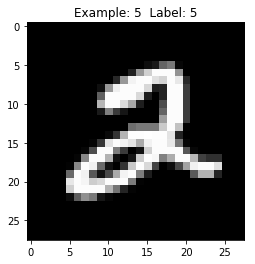

In [8]:
view_digit(5, pd_x_train, pd_y_train)

In [9]:
#######
#
# PCA using sklearn library
# 
# Verified by using SVD method and try to understand the basic of PCA
#
######

In [10]:
from sklearn.decomposition import PCA

n_components = 784  ## Use all the components!! which means no dimension reduction
whiten = False
random_state = 2019

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [11]:
pca

PCA(copy=True, iterated_power='auto', n_components=784, random_state=2019,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
X_train_PCA = pca.fit_transform(pd_x_train)

In [13]:
type(X_train_PCA)

numpy.ndarray

In [14]:
pd_x_train_pca = pd.DataFrame(data=X_train_PCA)

In [15]:
pd_x_train_pca.tail()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
49995,1.147861,-1.973071,-3.739088,1.209615,-0.312010,-0.893621,1.491426,0.013879,-0.385597,-2.202875,...,-6.712014e-18,1.310919e-17,-1.481438e-17,5.019836e-19,-1.545816e-18,2.995998e-17,-6.555307e-18,6.405591e-19,7.283530e-18,-9.196453e-19
49996,1.416358,-0.252646,-0.809303,-0.523401,-3.905706,0.188043,-0.449584,-1.231882,-0.104555,0.510875,...,8.118895e-17,-7.078868e-18,-1.072750e-17,-6.018971e-18,-2.433989e-18,-2.465427e-17,1.570360e-17,-1.132633e-17,3.137690e-18,2.198237e-18
49997,-1.425061,-1.957856,-2.551206,0.094616,0.654076,-0.603855,0.312818,-0.047633,0.994543,0.222398,...,1.002453e-17,6.734745e-18,1.002399e-17,-8.215886e-18,-4.488208e-18,1.143734e-17,-9.516769e-18,1.881880e-18,4.012369e-18,2.195915e-18
49998,-1.507427,1.025314,0.107808,0.275914,2.285608,-0.590755,-0.676786,-0.062384,0.050031,1.578292,...,-1.074307e-17,6.539401e-18,-8.394093e-18,-2.065419e-18,-3.977971e-19,7.381378e-18,-2.323704e-18,-1.891797e-18,7.093746e-18,-6.561114e-19
49999,-1.396396,-0.646483,-2.573067,-0.501485,1.020739,0.449948,0.697814,-0.758292,1.040283,-0.563378,...,-1.776123e-18,-7.688034e-18,-6.613330e-18,1.114774e-17,-5.158177e-18,-3.913992e-18,-3.722244e-18,4.357680e-18,5.827368e-18,1.302726e-18


In [16]:
pd_x_train_pca.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,8.705481e-17,-1.165068e-16,1.412559e-16,-2.121192e-17,-4.939160e-17,3.825029e-16,2.210943e-16,3.659073e-17,-2.598632e-16,2.035816e-16,...,-1.133665e-19,6.551913e-19,6.089521e-19,6.033913e-19,6.115248e-19,6.124582e-19,3.944151e-19,4.411176e-20,2.608330e-19,-3.100766e-20
std,2.260153e+00,1.923793e+00,1.805181e+00,1.679311e+00,1.595849e+00,1.504815e+00,1.310801e+00,1.230092e+00,1.204784e+00,1.113683e+00,...,1.359713e-16,1.359698e-16,1.359700e-16,1.359700e-16,1.359700e-16,1.345162e-16,1.080740e-16,7.414883e-17,5.007043e-17,1.309906e-17
min,-4.263455e+00,-5.392479e+00,-5.384063e+00,-5.904962e+00,-5.067551e+00,-4.873599e+00,-4.325917e+00,-4.110052e+00,-4.601781e+00,-3.839773e+00,...,-1.504133e-14,-4.036384e-16,-8.628572e-16,-4.820929e-16,-3.635092e-16,-4.681904e-16,-5.842682e-15,-5.596587e-15,-3.297532e-15,-1.083167e-15
25%,-1.546649e+00,-1.424033e+00,-1.290884e+00,-1.205469e+00,-1.070137e+00,-1.041482e+00,-9.356952e-01,-8.304925e-01,-8.328339e-01,-7.128356e-01,...,-8.247279e-18,-4.060613e-18,-6.861787e-18,-6.600989e-18,-4.259239e-18,-6.990886e-18,-6.941408e-18,-4.087965e-18,-2.999080e-18,-8.102422e-19
50%,-1.804307e-01,-3.319104e-01,1.896551e-02,-1.441963e-02,4.755320e-02,4.013291e-02,-6.495056e-02,-8.784215e-02,-3.006548e-02,4.497852e-02,...,-5.434607e-21,5.100781e-19,9.350578e-19,2.652972e-19,3.890102e-19,7.254919e-19,2.768169e-20,9.134812e-20,1.724618e-19,6.606959e-21
75%,1.310291e+00,1.495633e+00,1.275941e+00,1.063601e+00,1.087312e+00,1.047874e+00,8.808302e-01,7.781972e-01,8.108876e-01,7.876174e-01,...,8.406562e-18,4.880750e-18,8.631241e-18,7.081140e-18,4.958443e-18,8.170244e-18,6.989121e-18,4.283897e-18,3.193513e-18,8.027944e-19
max,9.221974e+00,5.649921e+00,6.054203e+00,5.978151e+00,5.357468e+00,4.978160e+00,5.010916e+00,4.504282e+00,5.754154e+00,4.061396e+00,...,2.121874e-14,3.027976e-14,2.994363e-14,3.017960e-14,3.027997e-14,2.975680e-14,1.235814e-14,8.053083e-15,3.648855e-15,1.102895e-15


In [17]:
# Percentage of Variance Captured by 784 principal components
# Should be 100% as n_components equals the number of total dimensions
print("Variance Explained by all 784 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  1.0


In [18]:
## How to figure out which component has the highest variance/info?
## All the variance ratio is in pca.explained_variance_ratio_
## Let's sort it ... but how do we know which 'component' it refers to?

sorted(pca.explained_variance_ratio_, reverse=True)

[0.097443855143178035,
 0.070598487790052414,
 0.062161309117278567,
 0.053794860211676253,
 0.048580545390508184,
 0.043196115228376131,
 0.032775740119406427,
 0.028863835721918044,
 0.027688348048879131,
 0.023659280918300739,
 0.0209951966027624,
 0.020204062658683887,
 0.017157912766466256,
 0.016817947779557866,
 0.015792670127153612,
 0.014927532218090244,
 0.013181674194264898,
 0.012765534050562376,
 0.011865140253919148,
 0.011510205400914792,
 0.010691066586095737,
 0.010074997006706986,
 0.0095362976924110322,
 0.0090786176164331569,
 0.0088278804364609904,
 0.0083695093604180641,
 0.0081754076631001711,
 0.0078479604020873922,
 0.0074201408568034628,
 0.0069070589709772506,
 0.0065856292935432019,
 0.0064365300926416029,
 0.0060271883786806903,
 0.0058530296390775895,
 0.0056943065622432829,
 0.005418524329465769,
 0.0050730911266375087,
 0.004883943841156365,
 0.0048205446932620402,
 0.0047335017148620031,
 0.0045597164930853678,
 0.0044141070820509238,
 0.004164275983601

In [19]:
## Let's explore what's in pd_x_train_pca
first_2_important_features = pd_x_train_pca.loc[:, 0:1]
first_2_important_features.head()

,0,1
0,0.461510,-1.246865
1,3.921652,-1.251651
2,-0.203711,1.547883
3,-3.148447,-2.296119
4,-1.442680,2.872079


In [20]:
type(X_train)

numpy.ndarray

In [21]:
######
#
# Now Let's verify with 
# 1. SVD way of finding the first 2 most important features (SVD and truncated SVD)
#   A = U.Sigma.V
#   Rotated A = A.dot(V.T)
# However using the original data X_train to do this caused my laptop to hang!
#
# 2. Using covariance matrix of the normalized X_train to find the eigenvectors/eigenvalues
#  Againg it hangs on using numpy cov to find covariance.
#  Try using pandas dataframe cov
#
######

X_train_mean_centered = X_train - np.mean(X_train, axis=0)
print(X_train_mean_centered)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [27]:
# The following hangs the laptop
#
# X_train_mean_centered_cov = np.cov(X_train_mean_centered)
# X_train_mean_centered_cov.shape

pd_X_train_mean_centered = pd.DataFrame(data=X_train_mean_centered)
X_train_mean_centered_cov = pd_X_train_mean_centered.cov()

In [28]:
# Panda dataframe cov is really fast!! Better than numpy version

X_train_mean_centered_cov.shape

(784, 784)

In [29]:
# Step 2
# Find eigenvectors/eigenvalues of the covariance matrix
# 
# Numpy Scipy library svd

from numpy.linalg import eig

eigenValues, eigenVectors = eig(X_train_mean_centered_cov)

print(eigenValues)
print(eigenVectors)

[  5.10829281e+00   3.70097988e+00   3.25867821e+00   2.82008442e+00
   2.54673473e+00   2.26446711e+00   1.71820046e+00   1.51312696e+00
   1.45150444e+00   1.24028893e+00   1.10062981e+00   1.05915625e+00
   8.99468131e-01   8.81646173e-01   8.27898104e-01   7.82545037e-01
   6.91022038e-01   6.69206752e-01   6.22005467e-01   6.03398743e-01
   5.60457081e-01   5.28160906e-01   4.99920707e-01   4.75927773e-01
   4.62783397e-01   4.38754240e-01   4.28578857e-01   4.11413111e-01
   3.88985555e-01   3.62088298e-01   3.45238012e-01   3.37421794e-01
   3.15962900e-01   3.06832988e-01   2.98512258e-01   2.84054944e-01
   2.65946322e-01   2.56030666e-01   2.52707097e-01   2.48144049e-01
   2.39033718e-01   2.31400445e-01   2.18303566e-01   2.07710772e-01
   2.02002074e-01   1.96095652e-01   1.89419357e-01   1.83726203e-01
   1.78379345e-01   1.68302103e-01   1.66810633e-01   1.63028766e-01
   1.54423454e-01   1.51130630e-01   1.49794989e-01   1.41939748e-01
   1.41134851e-01   1.34398068e-01

NameError: name 'eigenVecotrs' is not defined

In [37]:
print(eigenVectors.shape)
Rotated_X_train_mean_centered = eigenVectors.T.dot(X_train_mean_centered.T).T

(784, 784)


In [38]:
print(Rotated_X_train_mean_centered)

[[ 0.46150962 -1.24686457  0.04637347 ...,  0.          0.          0.        ]
 [ 3.92165161 -1.25165139  2.33550447 ...,  0.          0.          0.        ]
 [-0.20371094  1.54788339 -0.98039998 ...,  0.          0.          0.        ]
 ..., 
 [-1.42506111 -1.95785589 -2.55120632 ...,  0.          0.          0.        ]
 [-1.5074274   1.02531388  0.10780844 ...,  0.          0.          0.        ]
 [-1.39639626 -0.64648269 -2.57306668 ...,  0.          0.          0.        ]]


In [39]:
pd_Rotated_X_train_mean_centered = pd.DataFrame(data=Rotated_X_train_mean_centered)
first_2_principles = pd_Rotated_X_train_mean_centered.loc[:, 0:1]

In [40]:
first_2_principles.head()

,0,1
0,0.461510,-1.246865
1,3.921652,-1.251651
2,-0.203711,1.547883
3,-3.148447,-2.296119
4,-1.442680,2.872079


In [ ]:
## It is an exact match with using the sklearn PCA !!!! At least for the first two components.

# What does PCA achieve?
## Scatter plot of the components with most variance

In [41]:
## Scaltter plot to show how data is 'labeled' in an unsupervised way
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)
    plt.show()

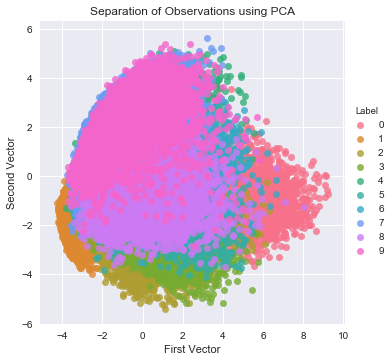

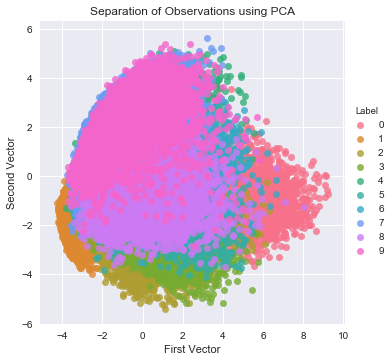

In [49]:
scatterPlot(pd_x_train_pca, pd_y_train, "PCA")

# Using SVD to do PCA
## Truncated SVD with numpy

In [ ]:
# SVD is similar to using eigendecomposition of the covariance matrix
# But it is applied to the original data (not a square matrix) rather than the covariance matrix

#
# X = train data
# X = U.dot(S.dot(V.T))
#
# X.T.dot(X) = Covariance = V.dot(S.dot(U.T)).dot(U.dot(S.dot(V.T))) // V.S.Ut.U.S.Vt
# Covariance = V.dot(S.dot(S)).dot(V.T) // V.S^2.Vt
#
# Which means X = S.V => Xrot.V = S.V => eigenvector definition?

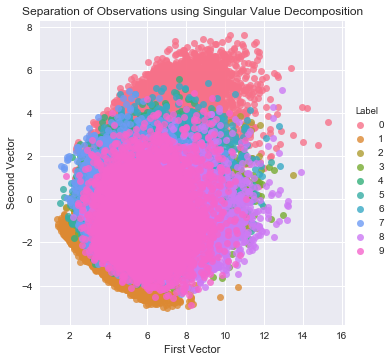

In [51]:
from sklearn.decomposition import TruncatedSVD

n_components = 200
algorithm = 'randomized'
n_iter = 5
random_state = 2018

svd = TruncatedSVD(n_components=n_components, algorithm=algorithm, \
                   n_iter=n_iter, random_state=random_state)

X_train_svd = svd.fit_transform(X_train)
pd_X_train_svd = pd.DataFrame(data=X_train_svd)

scatterPlot(pd_X_train_svd, pd_y_train, "Singular Value Decomposition")

# Other dimensionality approaches

### Kernel PCA - non linear 

### Random projection

### Isomap

### Dicitionary learning - ??